In [1194]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


from itertools import combinations

from scipy.stats import ttest_ind

from pandas.api.types import is_string_dtype

from pandas.api.types import is_numeric_dtype

pd.set_option('display.max_rows', 50) # выведем больше строк

pd.set_option('display.max_columns', 50) # выведем больше колонок

df = pd.read_csv('stud_math.csv')

In [1195]:
df.columns=(['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score'])

In [1196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       378 non-null object
famsize       368 non-null object
pstatus       350 non-null object
medu          392 non-null float64
fedu          371 non-null float64
mjob          376 non-null object
fjob          359 non-null object
reason        378 non-null object
guardian      364 non-null object
traveltime    367 non-null float64
studytime     388 non-null float64
failures      373 non-null float64
schoolsup     386 non-null object
famsup        356 non-null object
paid          355 non-null object
activities    381 non-null object
nursery       379 non-null object
granular      388 non-null float64
higher        375 non-null object
internet      361 non-null object
romantic      364 non-null object
famrel        368 non-null float64
freetime      384 non-null float64
goou

In [1197]:
ls_strdf=[]
def change_none(i):
    if (is_string_dtype(df[i])):
        df[i]=df[i].astype(str).apply(lambda x: None if x.strip() == '' else x)
        ls_strdf.append(i)
    #if (is_numeric_dtype(df[i])):
        #print('numeric')


In [1198]:
ls_strdf=[]
for i in df:
    if (is_string_dtype(df[i])):
        df[i]=df[i].astype(str).apply(lambda x: None if x.strip() == '' else x)
        df[i] = df[i].str.lower()
        ls_strdf.append(i)


In [1199]:
for i in df:
    if (is_numeric_dtype(df[i])):
        print(df[i].value_counts())
#insert_hist(i)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: granular, dtype: int64
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0 

In [1200]:
df.loc[df['fedu']==40,'fedu']=4
df.loc[df['famrel']==-1,'famrel']=1
#df['medu']=df.loc['medu']

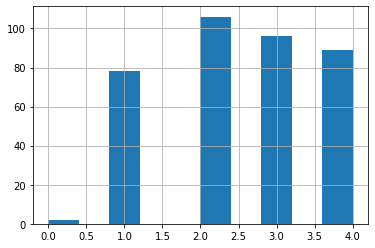

In [1201]:
df['fedu'].hist()

In [1202]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

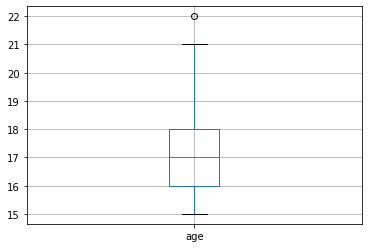

In [1203]:
df.boxplot(column=['age']) #выявили выброс равный 22

In [1204]:
df = df.loc[df.age <= 21] #удалили выброс

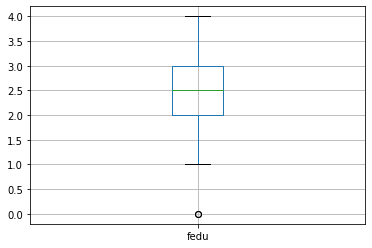

In [1205]:
df.boxplot(column=['fedu']) # выброс в образоваии отца

In [1206]:
df['fedu'].value_counts()

2.0    106
3.0     96
4.0     89
1.0     77
0.0      2
Name: fedu, dtype: int64

In [1207]:
ind_missing = df[df['fedu'] ==0].index
df= df.drop(ind_missing, axis=0)
#print(ind_missing) Удаляем строки с выбросами 

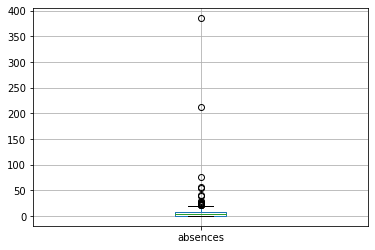

In [1208]:
df.boxplot(column=['absences'])

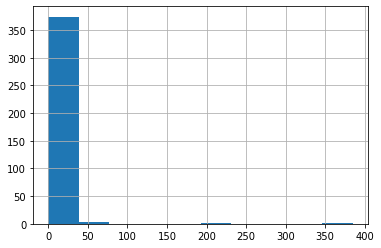

In [1209]:
df['absences'].hist()

In [1210]:
df['absences'].describe()

count    380.000000
mean       7.268421
std       23.552032
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [1211]:
ind_missing = df[df['absences'] >30].index# данные имеют выбросы , наверное надо удалить все что больше 50 , % небольшой
df= df.drop(ind_missing, axis=0)

In [1212]:
df['absences'].value_counts()

0.0     111
2.0      59
4.0      53
6.0      31
8.0      20
10.0     17
12.0     12
14.0     12
3.0       8
16.0      6
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
11.0      2
15.0      2
17.0      1
25.0      1
26.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
24.0      1
Name: absences, dtype: int64

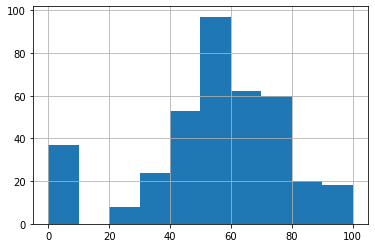

In [1213]:
df['score'].hist()

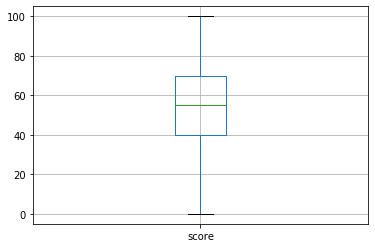

In [1214]:
df.boxplot(column=['score'])

In [1215]:
df['score'].value_counts()

50.0     53
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     28
70.0     27
45.0     25
80.0     15
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [1216]:
import numpy as np
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
pstatus - 0.0%
medu - 1.0%
fedu - 6.0%
mjob - 0.0%
fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 7.0%
studytime - 2.0%
failures - 5.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
granular - 2.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


In [1217]:
ind_missing =df[df['score'].isnull()].index# данные имеют нулевые значения 2% 
df= df.drop(ind_missing, axis=0)

In [1218]:
df['studytime'].corr(df['granular']) # корреляция двух столбцов , думаю можно убрать один 

-1.0

In [1219]:
df.drop(['granular'], inplace = True, axis = 1)

In [1220]:
df['traveltime'].value_counts()

1.0    233
2.0     90
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [1221]:
df[df['address']=='u']['traveltime'].median()

1.0

In [1222]:
df[df['address']=='r']['traveltime'].median()

2.0

In [1223]:
df[(df['reason']=='reputation') & (df['address']=='u')]['traveltime'].median()

1.0

In [1224]:
med = df[(df['reason']=='reputation') & (df['address']=='u')]['traveltime'].median()
print(med)
df.loc[df['address']=='u','traveltime'] = df['traveltime'].fillna(med)

1.0


In [1225]:
med = df[(df['reason']=='reputation') & (df['address']=='r')]['traveltime'].median()
print(med)
df.loc[df['address']=='r','traveltime'] = df['traveltime'].fillna(med)

2.0


In [1226]:
med=df['traveltime'].median()# пустые значения заполним средними по всему столбцу

In [1227]:
df['traveltime'] = df['traveltime'].fillna(med)

In [1228]:
df.loc[df['traveltime']==1,'address']=df['address'].astype(str).apply(lambda x: 'u' if x=='nan' else x)

In [1229]:
df.loc[df['traveltime']>1,'address']=df['address'].astype(str).apply(lambda x: 'r' if x=='nan' else x)

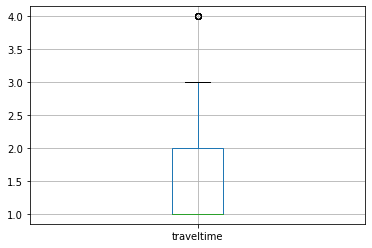

In [1230]:
df.boxplot(column=['traveltime'])

In [1231]:
df['traveltime'].value_counts()

1.0    254
2.0     97
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [1232]:
df[df['traveltime']==4] # это выбросы , 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
61,gp,f,16,u,gt3,t,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,nan,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,gp,m,15,r,gt3,nan,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,gp,m,15,u,le3,nan,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,nan,no,no,yes,nan,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,gp,m,17,r,le3,t,1.0,1.0,other,services,course,nan,4.0,2.0,3.0,no,no,nan,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,gp,m,18,u,nan,t,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,gp,m,17,r,gt3,t,2.0,2.0,services,other,course,mother,4.0,1.0,0.0,no,nan,no,no,yes,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,ms,f,18,r,gt3,t,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


In [1233]:
df['traveltime'].value_counts(dropna=False, normalize=True).head() #выбросы 1,8 % от выборки , попробуем приобразловать исходя из медианных значений 

1.0    0.670185
2.0    0.255937
3.0    0.055409
4.0    0.018470
Name: traveltime, dtype: float64

In [1234]:
med = df[(df['address']=='r')]['traveltime'].median()
print(med)
df.loc[(df['traveltime']==4) & (df['address']=='r'),'traveltime'] = med

2.0


In [1235]:
med = df[(df['address']=='u')]['traveltime'].median()
print(med)
df.loc[(df['traveltime']==4) & (df['address']=='u'),'traveltime'] = med

1.0


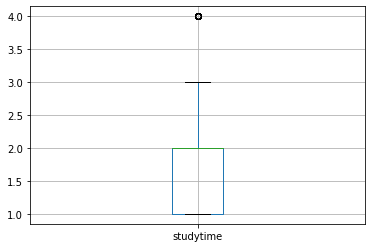

In [1236]:
df.boxplot(column=['studytime'])

In [1237]:
df['studytime'].value_counts(dropna=False, normalize=True).head() #

2.0    0.482850
1.0    0.266491
3.0    0.163588
4.0    0.068602
NaN    0.018470
Name: studytime, dtype: float64

In [1238]:
df['studytime'] = df['studytime'].fillna(df['studytime'].median()) #заполнил пустые значения медианными данными 

In [1239]:
df[ df['medu'].isnull()] # предположим , что сотрудник сервиса имеет образование 3

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,gp,f,16,u,le3,t,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,gp,m,16,r,gt3,nan,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,gp,m,18,u,gt3,nan,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,nan,nan,5.0,5.0,4.0,2.0,0.0,0.0


In [1240]:
df['mjob'].value_counts()

other       122
services     95
at_home      58
teacher      53
health       32
nan          19
Name: mjob, dtype: int64

In [1252]:
from scipy.stats import norm
def change_g(colum,m,job,edu):
    n=df[df[colum]==job][colum].count() # выборка из 95 человек , работающиъ в сервисе n=95
    x_=df[df[colum]==job][edu].mean() # среднее значением образования 
    #x_=df[df['mjob']=='services']['medu'].mean() 
    s=df[df[colum]==job][edu].std() # стандартное отклонение
    t=(x_-m)/(s/(n**0.5))
    p_value=round(2*(1-norm.cdf(t)),5)
    if p_value>0.05:
        print('гипотеза верна', p_value)
        df.loc[(df[colum]==job) & df[edu].isnull(),edu] = m
    else:
        print('гипотеза не верна')
#print(x_)

    
    return(p_value)
    


In [1256]:
jj=0
while jj<4:
    p_value=change_g('mjob',jj,'other','medu')
    jj+=1


гипотеза не верна
гипотеза не верна
гипотеза не верна
гипотеза верна 2.0


In [1257]:
df[ df['medu'].isnull()] # предположим , что сотрудник сервиса имеет образование 3


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [1258]:
df.head(3)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,gp,f,18,u,nan,a,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,gp,f,17,u,gt3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,gp,f,15,u,le3,t,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0


In [ ]:
df.loc[df['traveltime']==1,'address']=df['address'].astype(str).apply(lambda x: 'u' if x=='nan' else x)

In [1259]:
df['medu'].value_counts()

4.0    129
2.0     97
3.0     95
1.0     55
0.0      3
Name: medu, dtype: int64

In [1260]:
df[ df['medu']==3]['mjob'].describe()

count           95
unique           6
top       services
freq            38
Name: mjob, dtype: object

In [1261]:
df[ df['medu']==2]['mjob'].describe()

count        97
unique        5
top       other
freq         42
Name: mjob, dtype: object

In [1262]:
df[df['medu'].notnull()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,gp,f,18,u,nan,a,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,gp,f,17,u,gt3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,gp,f,15,u,le3,t,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,gp,f,15,u,gt3,t,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,gp,f,16,u,gt3,t,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,ms,f,18,u,gt3,t,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,nan,no,1.0,1.0,1.0,5.0,0.0,0.0
391,ms,m,17,u,le3,t,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,ms,m,21,r,gt3,t,1.0,1.0,other,other,course,nan,1.0,1.0,3.0,nan,no,no,no,no,nan,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,ms,m,18,r,le3,t,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,nan,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [1263]:
df['schoolsup'].value_counts(dropna=False, normalize=True).head()

no     0.852243
yes    0.124011
nan    0.023747
Name: schoolsup, dtype: float64

In [1264]:
df['famsup'].value_counts(dropna=False, normalize=True).head()

yes    0.556728
no     0.348285
nan    0.094987
Name: famsup, dtype: float64

In [1265]:
df['paid'].value_counts(dropna=False, normalize=True).head()

no     0.503958
yes    0.393140
nan    0.102902
Name: paid, dtype: float64

In [1266]:
df['activities'].value_counts(dropna=False, normalize=True).head()

yes    0.496042
no     0.467018
nan    0.036939
Name: activities, dtype: float64

In [1267]:
df['nursery'].value_counts(dropna=False, normalize=True).head()

yes    0.762533
no     0.197889
nan    0.039578
Name: nursery, dtype: float64

In [1268]:
df['higher'].value_counts(dropna=False, normalize=True).head()

yes    0.907652
nan    0.047493
no     0.044855
Name: higher, dtype: float64

In [1269]:
df.drop(['higher'], inplace = True, axis = 1)

In [1270]:
df['internet'].value_counts(dropna=False, normalize=True).head()

yes    0.76781
no     0.14248
nan    0.08971
Name: internet, dtype: float64

In [1271]:
df.head(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,score
0,gp,f,18,u,nan,a,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,gp,f,17,u,gt3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,gp,f,15,u,le3,t,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,gp,f,15,u,gt3,t,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,gp,f,16,u,gt3,t,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [1272]:
df['famsize'].value_counts(dropna=False, normalize=True).head()

gt3    0.654354
le3    0.277045
nan    0.068602
Name: famsize, dtype: float64

In [1273]:
df.groupby('famsize').median()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
famsize,,,,,,,,,,,,
gt3,17,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,3.0,55.0
le3,17,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,3.0,4.0,55.0
nan,17,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,4.0,4.0,50.0


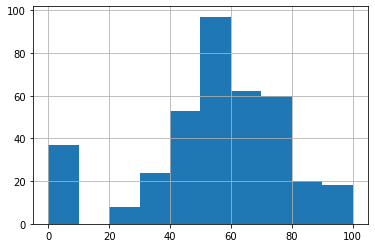

In [1274]:
df['score'].hist()

In [1275]:
df['score'].value_counts()

50.0     53
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     28
70.0     27
45.0     25
80.0     15
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


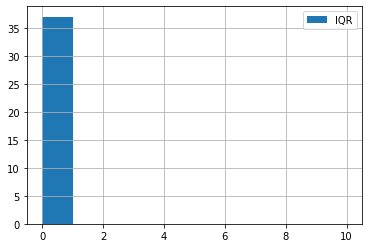

In [1276]:
median = df.score.median()
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.score.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [1277]:
df = df.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
df['score'].value_counts()

50.0     53
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     28
70.0     27
45.0     25
80.0     15
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [1278]:
df['sex'].value_counts(dropna=False, normalize=True).head()

f    0.525066
m    0.474934
Name: sex, dtype: float64

In [1279]:
df['romantic'].value_counts(dropna=False, normalize=True).head()

no     0.609499
yes    0.308707
nan    0.081794
Name: romantic, dtype: float64

In [1280]:
df['famrel'].value_counts(dropna=False, normalize=True).head()

4.0    0.459103
5.0    0.248021
3.0    0.160950
NaN    0.068602
2.0    0.042216
Name: famrel, dtype: float64

In [1281]:
df['freetime'].value_counts(dropna=False, normalize=True).head()

3.0    0.390501
4.0    0.284960
2.0    0.166227
5.0    0.094987
1.0    0.042216
Name: freetime, dtype: float64

In [1282]:
df['goout'].value_counts(dropna=False, normalize=True).head()

3.0    0.324538
2.0    0.261214
4.0    0.208443
5.0    0.131926
1.0    0.055409
Name: goout, dtype: float64

In [1283]:
df['health'].value_counts(dropna=False, normalize=True).head()

5.0    0.356201
3.0    0.224274
4.0    0.153034
1.0    0.116095
2.0    0.110818
Name: health, dtype: float64

In [1284]:
df['reason'].value_counts(dropna=False, normalize=True).head()

course        0.350923
home          0.261214
reputation    0.258575
other         0.084433
nan           0.044855
Name: reason, dtype: float64

In [1285]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.154164,-0.162060,0.113703,0.004202,0.147766,0.030124,0.016700,0.105297,-0.061304,0.140057,-0.148976
medu,-0.154164,1.000000,0.632792,-0.123840,0.080530,-0.246326,-0.003469,0.036966,0.063772,-0.047286,0.108757,0.222888
fedu,-0.162060,0.632792,1.000000,-0.062072,0.031643,-0.274618,-0.016698,-0.007307,0.051994,-0.000788,0.026882,0.139777
traveltime,0.113703,-0.123840,-0.062072,1.000000,-0.111853,0.018091,-0.017603,-0.073767,-0.010684,-0.041892,-0.011504,-0.083474
studytime,0.004202,0.080530,0.031643,-0.111853,1.000000,-0.172149,0.051417,-0.123561,-0.043432,-0.073016,-0.085995,0.113422
failures,0.147766,-0.246326,-0.274618,0.018091,-0.172149,1.000000,-0.046863,0.080159,0.084438,0.107874,0.086516,-0.347151
famrel,0.030124,-0.003469,-0.016698,-0.017603,0.051417,-0.046863,1.000000,0.169518,0.054354,0.095327,-0.104104,0.069211
freetime,0.016700,0.036966,-0.007307,-0.073767,-0.123561,0.080159,0.169518,1.000000,0.280992,0.075996,0.023871,0.022203
goout,0.105297,0.063772,0.051994,-0.010684,-0.043432,0.084438,0.054354,0.280992,1.000000,-0.010696,0.113288,-0.119511
health,-0.061304,-0.047286,-0.000788,-0.041892,-0.073016,0.107874,0.095327,0.075996,-0.010696,1.000000,-0.033205,-0.073825


In [1286]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts()).index[:]],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

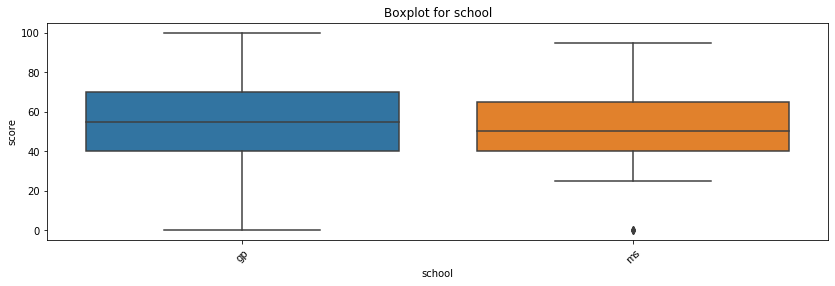

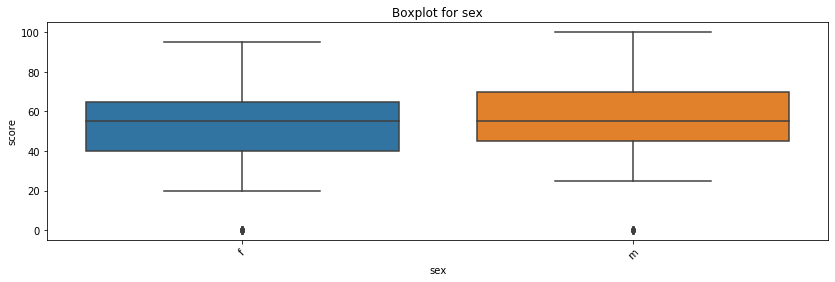

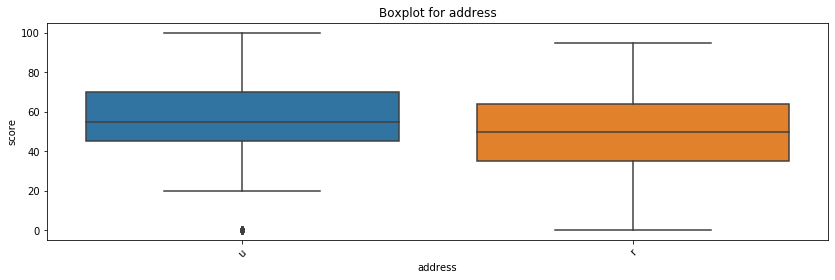

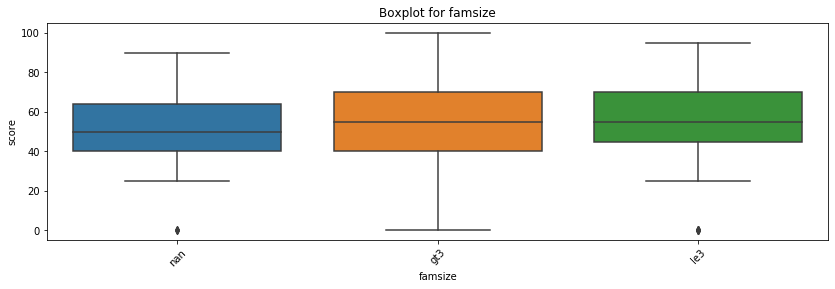

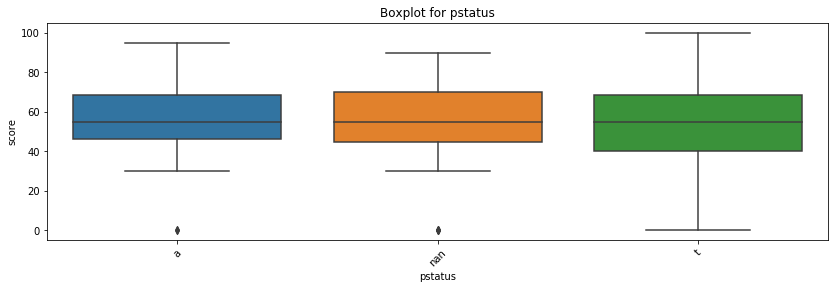

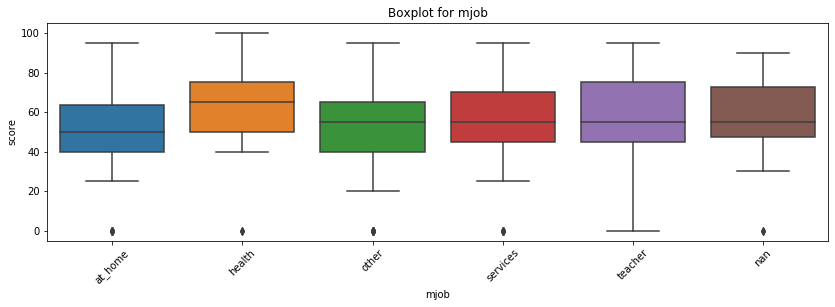

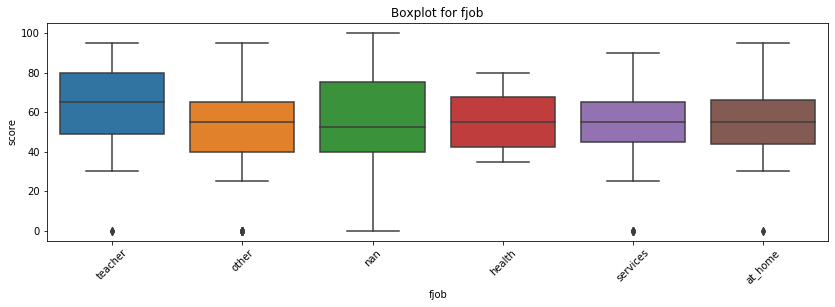

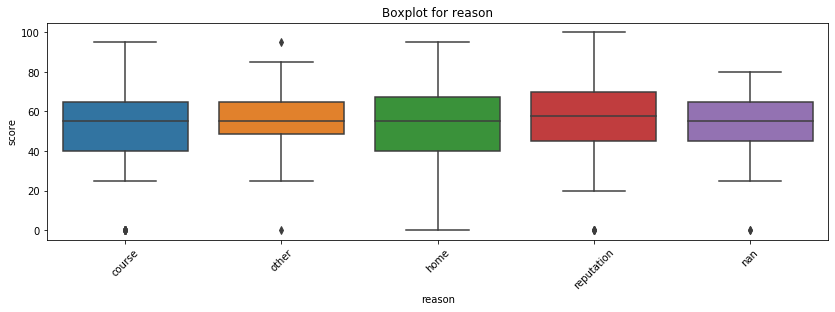

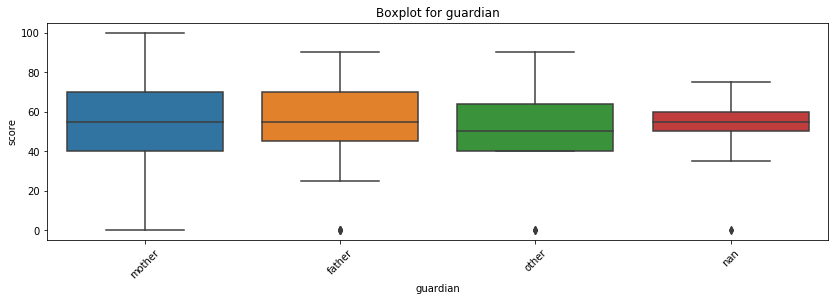

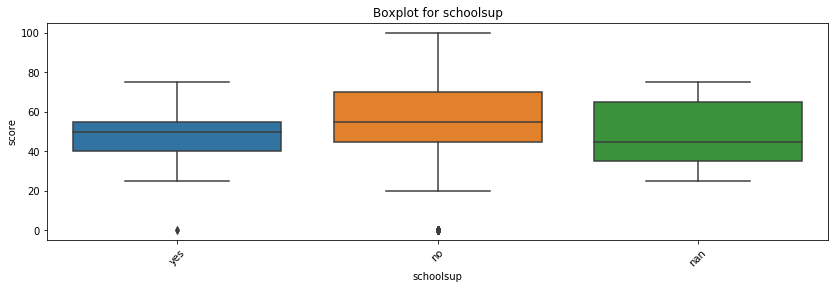

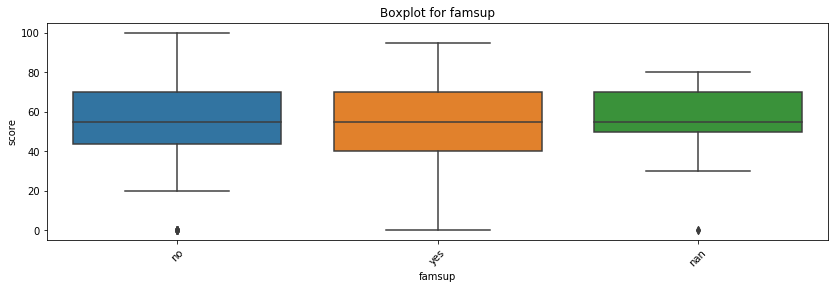

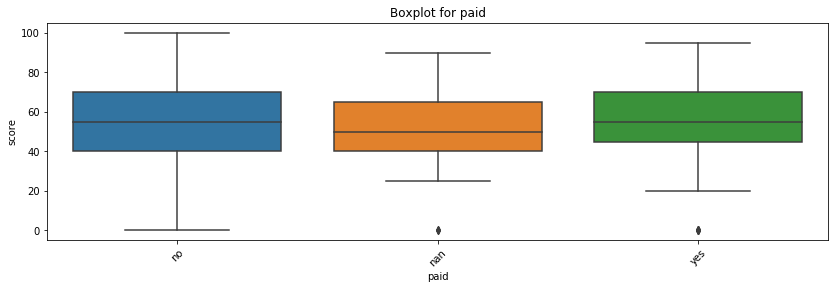

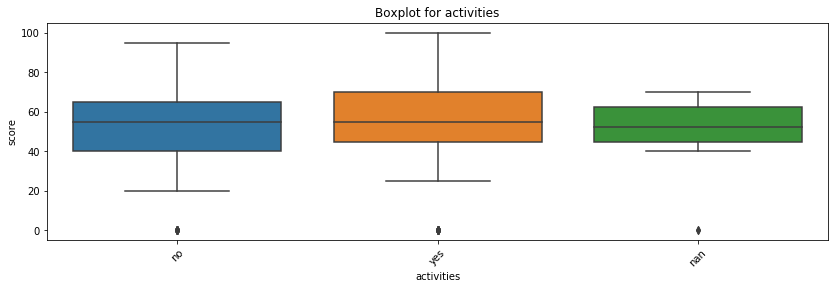

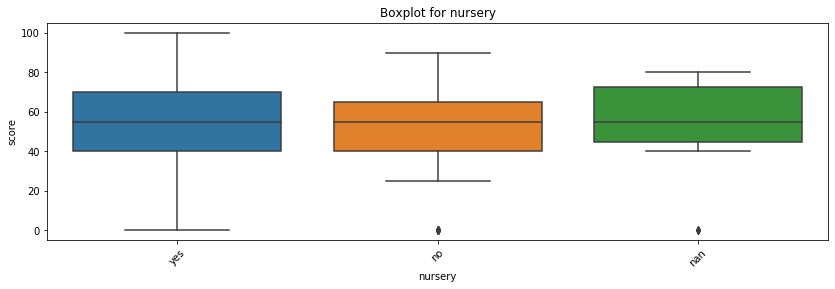

KeyError: 'higher'

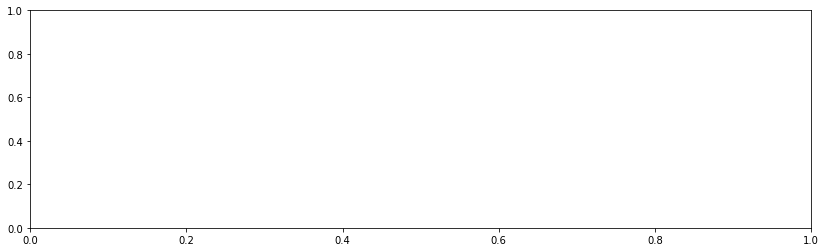

In [1287]:
for col in ls_strdf:
    get_boxplot(col)


In [ ]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1291]:
ls_strdf=[]
ls_nstrdf=[]
for i in df:
    if (is_string_dtype(df[i])):
        ls_strdf.append(i)
    else:
        ls_nstrdf.append(i)
for col in ls_strdf:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки romantic


In [1292]:
print(ls_nstrdf)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
